# 평가

### 분류 모델

- 정확도 (Accuracy)
- 오차행렬 (Counfusion Matrix)
- 정밀도 (Precision)
- 재현율 (Recall)
- F1 Score
- ROC AUC

### 정확도 (Accuracy)

정확도 = 예측 결과가 동일한 데이터 건수 / 전체 예측 데이터 건수

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score

In [121]:
class MyFakeClassifier(BaseEstimator):
    def fit(self, x,y):  # fit은 아무런 기능이 없음
        pass
    
    def predict(self, x): # 입력값으로 들어오는 x 데이터의 크기만큼 모두 0으로 만들어서 변환
        return np.zeros((len(x),1), dtype=bool)

In [122]:
digits=load_digits()

y=(digits.target==7).astype(int)  # 7이면 True 아니면 False
y

array([0, 0, 0, ..., 0, 0, 0])

In [123]:
x_train, x_test, y_train, y_test=train_test_split(digits.data, y, random_state=412)

In [124]:
# 불균형한 레이블 데이터 분포 확인

print('레이블 테스트 세트 크기 : ', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

레이블 테스트 세트 크기 :  (450,)
테스트 세트 레이블 0과 1의 분포도
0    406
1     44
dtype: int64


In [125]:
# Dummy Classifier로 학습/예측/정확도 평가

fakeclf=MyFakeClassifier()
fakeclf.fit(x_train, y_train)

fake_pred=fakeclf.predict(x_test)

print('정확도 : {:.3f}'.format(accuracy_score(y_test, fake_pred)))

정확도 : 0.902


### 오차 행렬 (Confusion Matrix)

![confusion_matrix](./confusion_matrix.jpg)

- TN : 실제값도 N이고, 예측도 N으로 한 경우
- FP : 실제값은 N인데, P로 예측한 경우
- FN : 실제값은 P인데, N으로 예측한 경우
- TP : 실제값도 P이고, 예측도 P로 한 경우

In [2]:
from sklearn.metrics import confusion_matrix

In [8]:
confusion_matrix(y_test, fake_pred)

array([[406,   0],
       [ 44,   0]], dtype=int64)

ndarray가

TN FP

FN TP

순으로 출력이 된다.

### 정밀도 (Precision) & 재현율 (Recall)

- 정밀도 : TP / (FP+TP)  -> Positive 라고 예측한 값중에 실제 Positive 인 정도
- 재현율 : TP / (FN+TP) -> Positive 인 값을 Positive 라고 예측한 정도

재현율은 민감도(Sensitivy) 혹은 TPR (True Positive Rate) 라고도 불린다.

--------
sklearn.metrics 의 precision_score 와 recall_score 메소드를 사용할 수 있다.

#### 정밀도와 재현율의 트레이드 오프

정밀도 또는 재현율을 특별히 강조해야 할 경우에는 결정 임계값 (threshold) 를 조절하여 수치를 높일 수 있다.

하지만 정밀도와 재현율은 상호 보완적인 관계에 있기 때문에, 어느 한쪽을 올리면 다른 한쪽이 떨어질 수 있다. (Trade-off)

In [23]:
from sklearn.preprocessing import Binarizer

x=[[1,-1,2],
  [2,0,0],
  [0,1.1,1.2]]

# x의 개별 원소들이 threshold 값보다 같거나 작으면 0을, 크면 1을 반환

binarizer=Binarizer(threshold=1.1)

print(binarizer.fit_transform(x))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [24]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [29]:
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)

In [30]:
from sklearn.linear_model import LogisticRegression

logit=LogisticRegression()
logit.fit(X_train, y_train)

y_pred=logit.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[[104  14]
 [ 13  48]]


C:\Users\river\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [31]:
# predict_proba 메소드를 사용하여 개별 데이터의 예측 확률을 확인할 수 있다.

pred_proba = logit.predict_proba(X_test)
y_pred  = logit.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba ,y_pred.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])

pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.46162417 0.53837583]
 [0.87858538 0.12141462]
 [0.87723741 0.12276259]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.46162417 0.53837583 1.        ]
 [0.87858538 0.12141462 0.        ]
 [0.87723741 0.12276259 0.        ]]


#### 임계값 변환하기 (결과는 predict_proba를 사용하여 확인)

In [41]:
from sklearn.metrics import precision_score, recall_score

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))

In [42]:
from sklearn.preprocessing import Binarizer

custom_threshold=0.5

pred_proba_1=pred_proba[:,1].reshape(-1,1) # Positive 클래스의 칼럼 하나만 추출

# binarizer 적용

binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict=binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


In [44]:
custom_threshold=0.4

pred_proba_1=pred_proba[:,1].reshape(-1,1) # Positive 클래스의 칼럼 하나만 추출

# binarizer 적용

binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict=binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361


threshold 를 낮췄을 때, 정밀도(Positive라고 예측한 경우중 실제 Positive) 와 재현율(실제 Positive인것을 Positive라고 예측) 가 변함을 확인할 수 있다.

In [79]:
# 임계값에 변화를 주며 확인

thresholds=[0.4, 0.45, 0.5, 0.55, 0.6]


def get_eval_by_threshold(y_test, pred_proba_1, thresholds):
    metric_list=list()
    
    for i in thresholds:
        binarizer=Binarizer(threshold=i).fit(pred_proba_1)
        
        custom_predict=binarizer.transform(pred_proba_1)
        
        accuracy=np.round(accuracy_score(y_test, custom_predict),3)
        precision=np.round(precision_score(y_test, custom_predict),3)
        recall=np.round(recall_score(y_test, custom_predict),3)
        
        metric_list.extend((accuracy, precision, recall))
    
    metric_list=np.array(metric_list).reshape(3,-1, order='F')
    df=pd.DataFrame(data=metric_list, columns=thresholds, index=['accuracy','precision','recall'])
    
    print(df)
    
get_eval_by_threshold(y_test, pred_proba_1, thresholds)

            0.40   0.45   0.50   0.55   0.60
accuracy   0.838  0.849  0.849  0.866  0.877
precision  0.729  0.766  0.774  0.836  0.882
recall     0.836  0.803  0.787  0.754  0.738


precision_recall_curve 라는 메소드를 통해 해당 내용을 구현할 수 있다

#### precision_recall_curve

In [81]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률을 추출

pred_proba_class1=logit.predict_proba(X_test)[:,1]

# 실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력

precisions, recalls, thresholds=precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임계값 배열의 Shape : ', thresholds.shape)

반환된 분류 결정 임계값 배열의 Shape :  (143,)


In [85]:
# 샘플로 10건만 추출하면서, 임계값을 15step으로 추출

thr_index=np.arange(0,thresholds.shape[0],15)

print('샘플 추출을 위한 임계값 배열의 index 10개 : ',thr_index)
print('샘플용 10개의 임계값 : ',np.round(thresholds[thr_index],2))

샘플 추출을 위한 임계값 배열의 index 10개 :  [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임계값 :  [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]


In [86]:
# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값

print('샘플 임계값별 정밀도 : ',np.round(precisions[thr_index],3))
print('샘플 임계값별 재현율 : ',np.round(recalls[thr_index],3))

샘플 임계값별 정밀도 :  [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율 :  [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


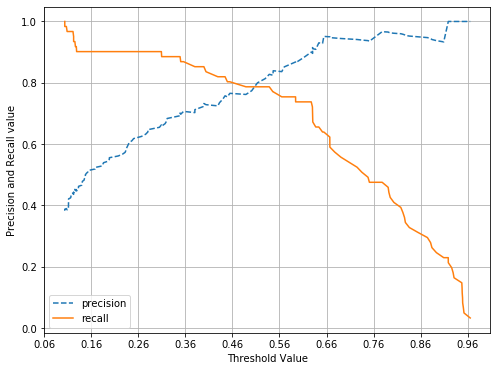

In [91]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls,thresholds=precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    plt.plot(thresholds, precisions[:thresholds.shape[0]], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[:thresholds.shape[0]], label='recall')
    
    # threshold 값 x축의 scale을 0.1 단위로 변경
    start, end= plt.xlim() # get current xlim
    plt.xticks(np.round(np.arange(start, end, 0.1), 2)) # change xticks
    
    plt.xlabel('Threshold Value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, pred_proba_class1)

임계값이 올라갈수록 정밀도가 올라가나, 재현율은 낮아짐을 확인할 수 있다.

#### 정밀도와 재현율의 맹점

- Positive의 예측의 임계값을 변경함에 따라 정밀도와 재현율의 수치가 변경된다.


정밀도가 100%가 되는 방법

- 확실한 기준이 되는 경우만 Positive로 예측하고 나머지는 모두 Negative로 예측한다.
- 정밀도는 TP/(TP+FP) 이기 때문에, Negative로 예측한 값이 틀려도 결과에 영향이 없다.

재현율이 100%가 되는 방법

- 모든 결과를 Positive로 예측한다.
- 재현율은 TP/(TP+FN) 이기 때문에, Positive로 예측한 결과가 틀려도 결과에 영향이 없다.


따라서, 정밀도 또는 재현율 중 하나만 스코어가 좋고 다른 하나는 스코어가 나쁜 분류는 성능이 좋지 않은 분류로 간주할 수 있다.

### F1 Score

- F1 Score는 정밀도와 재현율을 결합한 지표이다.

![f1_score](./f1_score.png)



정밀도와 재현율이 어느 한쪽으로 치우치지 않을때 상대적으로 높은 값을 가진다.

In [92]:
from sklearn.metrics import f1_score

f1=f1_score(y_test, y_pred) # y_pred=logit.predict(x_test)

print('F1 Score : {:.3f}'.format(f1))

F1 Score : 0.780


In [94]:
# 임계값에 변화를 주며 확인

thresholds=[0.4, 0.45, 0.5, 0.55, 0.6]


def get_eval_by_threshold(y_test, pred_proba_1, thresholds):
    metric_list=list()
    
    for i in thresholds:
        binarizer=Binarizer(threshold=i).fit(pred_proba_1)
        
        custom_predict=binarizer.transform(pred_proba_1)
        
        accuracy=np.round(accuracy_score(y_test, custom_predict),3)
        precision=np.round(precision_score(y_test, custom_predict),3)
        recall=np.round(recall_score(y_test, custom_predict),3)
        f1=np.round(f1_score(y_test, custom_predict),3)
        
        metric_list.extend((accuracy, precision, recall,f1))
    
    metric_list=np.array(metric_list).reshape(4,-1, order='F')
    df=pd.DataFrame(data=metric_list, columns=thresholds, index=['accuracy','precision','recall','f1 score'])
    
    print(df)
    
get_eval_by_threshold(y_test, pred_proba_1, thresholds)

            0.40   0.45   0.50   0.55   0.60
accuracy   0.838  0.849  0.849  0.866  0.877
precision  0.729  0.766  0.774  0.836  0.882
recall     0.836  0.803  0.787  0.754  0.738
f1 score   0.779  0.784  0.780  0.793  0.804


임계값이 0.6 일때 F1스코어가 가장 높음을 확인할 수 있다.

그러나 재현율이 가장 낮기도 하다.

### ROC curve & AUC

ROC곡선은 FPR(False Positive Rate)이 변할 때, TPR(True Positive Rate)이 어떻게 변하는지를 나타내는 곡선이다.
- TPR : 재현율과 동일하다 -> TP/(TP+FN)
- 특이성 : TNR = TN/(TN+FP)

- FPR : 1-특이성 = 1-(TN/(FP+TN)) = FP/(FP+TN)

In [104]:
from sklearn.metrics import roc_curve

pred_proba_class1=logit.predict_proba(X_test)[:,1]

fpr,tpr,thresholds=roc_curve(y_test, pred_proba_class1)

# 15 step 씩 끊어서 임계값 인덱스 생성

thr_index=np.arange(0, thresholds.shape[0], 5)

print('샘플용 10개의 임계값 : ', np.round(thresholds[thr_index],2))

샘플용 10개의 임계값 :  [1.97 0.75 0.63 0.59 0.49 0.4  0.31 0.15 0.12 0.11 0.1 ]


In [108]:
print('샘플 임계값 별 FPR : ', np.round(fpr[thr_index],3))
print('샘플 임계값 별 TPR : ', np.round(tpr[thr_index],3))

샘플 임계값 별 FPR :  [0.    0.017 0.034 0.059 0.127 0.161 0.237 0.483 0.61  0.703 0.814]
샘플 임계값 별 TPR :  [0.    0.475 0.672 0.754 0.787 0.852 0.885 0.902 0.934 0.967 0.984]


임계값이 1에 가까운 점에서 점점 작아지면서, FPR이 커진다. (임계값이 1에 가까울수록 Positive로 예측하지 않기 때문에, FP 자체의 값이 작음)

FPR이 조금씩 커질 때 TPR은 가파르게 커진다.

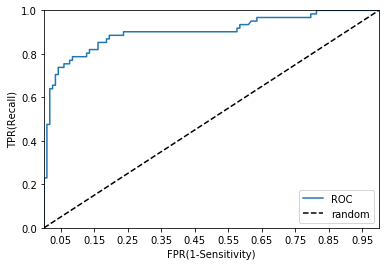

In [115]:
def roc_curve_plot(y_test, pred_proba_c1):
    fpr, tpr, thresholds=roc_curve(y_test, pred_proba_c1)
    
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0,1],[0,1],'k--', label='random')
    
    start, end=plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1) # 0~1 로 범위 맞춤
    plt.ylim(0,1)
    plt.xlabel('FPR(1-Specificity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba_class1)

In [119]:
from sklearn.metrics import roc_auc_score

y_pred=logit.predict(X_test)
roc_score=roc_auc_score(y_test, y_pred)

print('ROC AUC 값 : {:.4f}'.format(roc_score))

ROC AUC 값 : 0.8341
